In [5]:
import os
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import linear_model
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [6]:
data = pd.read_csv("Sales.csv")

In [7]:
data["Date"] = pd.to_datetime(data["Date"])
data=data.sort_values(["Date"])
data["Quarter"] = data["Date"].dt.quarter
data["Year"] = data["Date"].dt.year
data["Month"] = data["Date"].dt.month

In [9]:
data['Year'].value_counts()

2020    12
2019    12
2018    12
2017    12
2016    12
2015    12
2014    12
2013    12
2021     9
Name: Year, dtype: int64

In [20]:
Train.loc[data['Month']== 1]['Sales']

,Date,Sales,Quarter,Year,Month
0,2013-01-01,2815,1,2013,1
12,2014-01-01,2541,1,2014,1
24,2015-01-01,3113,1,2015,1
36,2016-01-01,5375,1,2016,1
48,2017-01-01,3633,1,2017,1
60,2018-01-01,4016,1,2018,1
72,2019-01-01,2639,1,2019,1
84,2020-01-01,3934,1,2020,1
96,2021-01-01,4348,1,2021,1


In [10]:
Train=data[(data.Year<2020)] #modify date according to your dataset; Train : 2017-2018
Test=data[(data.Year>=2020)]  #modify date according to your dataset; Test : 2019

In [22]:
Train.loc[data['Month']== 1]['Sales']

0     2815
12    2541
24    3113
36    5375
48    3633
60    4016
72    2639
Name: Sales, dtype: int64

In [ ]:
Train.groupby(['Month'])['Sales'].sum()

In [26]:
Train['Months_sum'] = Train.groupby(['Month'])['Sales'].transform(sum)

In [28]:
Train['Months_sum'].head()

0    24132
1    22389
2    25585
3    26161
4    27721
Name: Months_sum, dtype: int64

In [27]:
Train['Sales'].sum()

393439

In [29]:
Train['S.I'] = Train['Months_sum'].apply(lambda x: ((x*12)/(Train['Sales'].sum())))

In [31]:
Train['S.I'].value_counts()

1.208787    7
0.797918    7
1.800523    7
0.730116    7
0.380308    7
0.736033    7
0.860321    7
0.780350    7
0.923396    7
2.253879    7
0.682871    7
0.845498    7
Name: S.I, dtype: int64

In [32]:
Train=Train.sort_values(["Date"])
Train.index=range(len(Train))
Train["ID"]=range(1,(len(Train)+1))

In [33]:
lm = linear_model.LinearRegression()
X = np.array(Train[["ID"]]) # In case of no extra variable in the dataset, remove the extra variable name from the list, then append the line with ".reshape(-1, 1)"
Y = np.array(Train["Sales"]).reshape(-1,1)

In [34]:
model = lm.fit(X,Y)

In [35]:
Test["ID"]=range(len(Test))
Test["ID"]=Test["ID"]+max(Train["ID"])
X_test=np.array(Test[["ID"]]) # In case of no extra variable in the dataset, remove the extra variable name from the list, then append the line with ".reshape(-1, 1)"
Y_test=model.predict(X_test)

In [37]:
Test['Trend'] = Y_test

In [41]:
Test['Prediction'] = Y_test*np.array(Train.iloc[0:len(Y_test)]["S.I"]).reshape(-1,1)

In [43]:
Test.head()

,Date,Sales,Quarter,Year,Month,ID,Trend,Prediction
84,2020-01-01,3934,1,2020,1,84,6208.707283,4569.812067
85,2020-02-01,3162,1,2020,2,85,6245.452094,4264.836794
86,2020-03-01,4286,1,2020,3,86,6282.196905,4902.310381
87,2020-04-01,4676,2,2020,4,87,6318.941716,5041.996373
88,2020-05-01,5010,2,2020,5,88,6355.686528,5373.722063


No handles with labels found to put in legend.


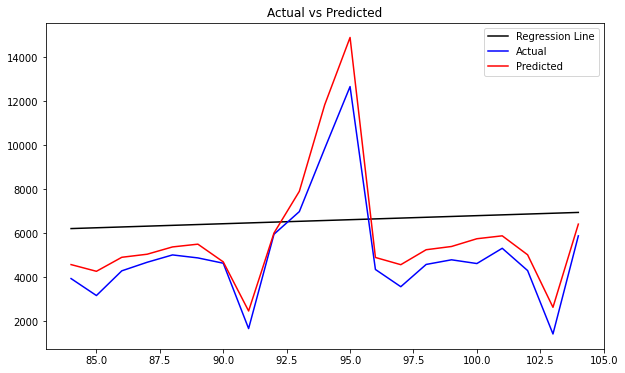

In [44]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
plt.legend(loc='best')
plt.title('Actual vs Predicted')
plt.plot(Test['Trend'], color ="black", label = "Regression Line")
plt.plot(Test['Sales'], color ="blue", label = "Actual")
plt.plot(Test['Prediction'], color="red", label = "Predicted")
plt.legend()
plt.show()